In [491]:
#Importing all the libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 15,6

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import random
import time

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [492]:
# df1 = pd.read_csv(r'C:\Users\Anirudh Garg\Desktop\socialcops\Monthly_data_cmo.csv')

In [493]:
df1 = pd.read_excel(r'C:\Users\Anirudh Garg\Desktop\trail.xlsx')

In [494]:
df2 = pd.read_csv(r'C:\Users\Anirudh Garg\Desktop\socialcops\CMO_MSP_Mandi.csv')

In [495]:
le = preprocessing.LabelEncoder()          #preprocessing has already been imported
df2['label'] = le.fit_transform(df2['commodity'])

In [496]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
Commodity     155 non-null object
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       155 non-null int64
msp_filter    155 non-null int64
label         155 non-null int64
dtypes: int64(4), object(3)
memory usage: 8.5+ KB


In [497]:
# df2_grouped = df2.groupby('label')

In [498]:
df2.replace('', np.NaN, inplace=True)

In [499]:
# finding no. of missing values in df2

miss = df2.isnull().sum()
miss= miss[miss > 0] 
miss.sort_values(inplace=True)
miss

Series([], dtype: int64)

In [500]:
# ********************** NOT working********************************

# tried the below code to fill the nan values in cmo_msp_mandi file but dont know why it is not working.

for group2_name, df2_group in df2.groupby('label'):
    df2_group['msprice'].fillna(df2_group['msprice'].mean(), inplace=True)
    
# Also tried this code for the same but dont know why it is not working

for group2_name, df2_group in df2.groupby('label'):
    arr3 = df2_group['msprice']
    elements3 = numpy.array(arr3)
    mean3 = numpy.mean(elements3, axis=0)
    df2_group['msprice'].replace( 'NaN', mean3, inplace=True) 

In [501]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
Commodity     155 non-null object
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       155 non-null int64
msp_filter    155 non-null int64
label         155 non-null int64
dtypes: int64(4), object(3)
memory usage: 8.5+ KB


In [502]:
df2.drop('Type', axis=1, inplace=True)
df2.drop('msp_filter', axis=1, inplace=True)
df2.drop('Commodity', axis=1, inplace=True)

In [503]:
df1.drop('APMC', axis=1, inplace=True)
df1.drop('Commodity', axis=1, inplace=True)
df1.drop('Year', axis=1, inplace=True)
df1.drop('Month', axis=1, inplace=True)
df1.drop('district_name', axis=1, inplace=True)
df1.drop('state_name', axis=1, inplace=True)

In [504]:
df1["apmc_commodity"] = df1["apmc"] + "_" + df1["commodity"]

In [505]:
le = preprocessing.LabelEncoder()                    #preprocessing has already been imported
df1['label'] = le.fit_transform(df1['apmc_commodity'])

In [506]:
df1.drop('commodity', axis=1, inplace=True)
df1.drop('apmc', axis=1, inplace=True)

In [507]:
for index, row in df1.iterrows():
    if row['modal_price'] == 0:
        row['modal_price'] = (row['max_price'] + row['min_price'])/2

In [508]:
df1.drop('min_price', axis=1, inplace=True)
df1.drop('max_price', axis=1, inplace=True)

In [509]:
# df1_grouped = df1.groupby('label')

In [510]:
for group_name, df_group in df1.groupby('label'):
    arr = df_group['arrivals_in_qtl']
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    
    drop0=np.array(arr.index)
    drop1=drop0[elements<(mean-2*sd)]
    drop2=drop0[elements>(mean+2*sd)]
    
    drop1=np.concatenate([drop1,drop2])
    
    df1.drop(drop1,inplace=True,axis=0)

#     for row_index, row in df_group.iterrows():
#         if ((row['arrivals_in_qtl'] < mean - sd)  or (row['arrivals_in_qtl'] > mean + sd)):
#             df1.drop(row_index)


In [511]:
# df1_grouped2 = df1.groupby('label')

In [512]:
for group_name2, df_group2 in df1.groupby('label'):
    arr = df_group2['modal_price']
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    
    drop0=np.array(arr.index)
    drop1=drop0[elements<(mean-2*sd)]
    drop2=drop0[elements>(mean+2*sd)]
    
    drop1=np.concatenate([drop1,drop2])
    
    df1.drop(drop1,inplace=True,axis=0)

In [513]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 26
Data columns (total 5 columns):
arrivals_in_qtl    26 non-null int64
modal_price        26 non-null int64
date               26 non-null object
apmc_commodity     26 non-null object
label              26 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [514]:
df1['date'] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 26
Data columns (total 5 columns):
arrivals_in_qtl    26 non-null int64
modal_price        26 non-null int64
date               26 non-null datetime64[ns]
apmc_commodity     26 non-null object
label              26 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.2+ KB


In [515]:
df1.set_index('date', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2014-09-01 to 2016-11-01
Data columns (total 4 columns):
arrivals_in_qtl    26 non-null int64
modal_price        26 non-null int64
apmc_commodity     26 non-null object
label              26 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


In [516]:
df1.head()

,arrivals_in_qtl,modal_price,apmc_commodity,label
date,,,,
2014-09-01,2779,1744,aamgaon_paddy-unhusked,0
2014-10-01,2195,1670,aamgaon_paddy-unhusked,0
2014-11-01,10153,1507,aamgaon_paddy-unhusked,0
2014-12-01,14608,1518,aamgaon_paddy-unhusked,0
2015-02-01,7674,1505,aamgaon_paddy-unhusked,0


In [517]:
df1.index

DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01'],
              dtype='datetime64[ns]', name=u'date', freq=None)

In [518]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [519]:
# df1_grouped3 = df1.groupby('label')

In [520]:
# df1_grouped3.size()

In [521]:
# for group_name3, df_group3 in df1.groupby('label'):
#     print df_group3.size()
        
      

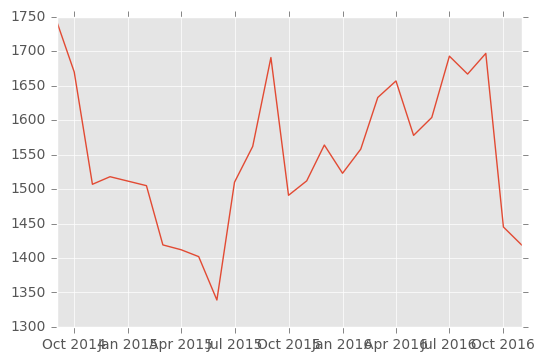

In [522]:
for group_name3, df_group3 in df1.groupby('label'):
    ts = df_group3['modal_price']
    plt.plot(ts)

# test_stationarity(ts)


In [523]:
from statsmodels.tsa.seasonal import seasonal_decompose
for group_name3, df_group3 in df1_grouped3:
    ts = df_group3['modal_price']

    decomposition = seasonal_decompose(ts , filt=None, freq=10)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.show()
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.show()
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='seasonality')
    plt.show()
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.show()
    plt.legend(loc='best')
    plt.tight_layout()

In [524]:
from datetime import datetime
ts[datetime(2014,9,1)]

1744

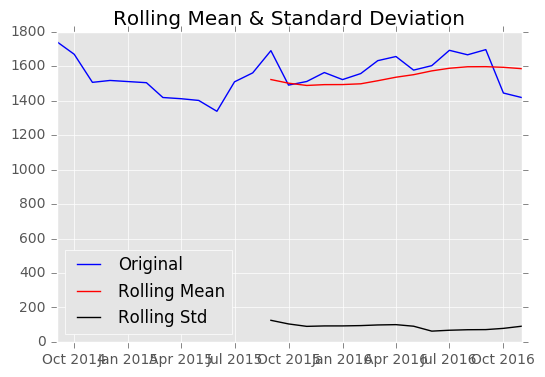

Results of Dickey-Fuller Test:
Test Statistic                 -2.698754
p-value                         0.074254
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
dtype: float64


In [525]:
test_stationarity(ts)

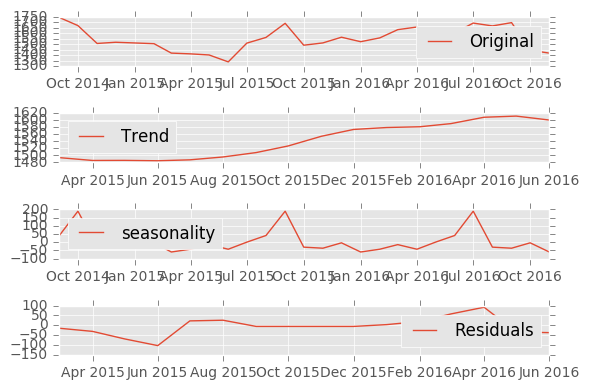

In [526]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(ts , filt=None, freq=10)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(ts, label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

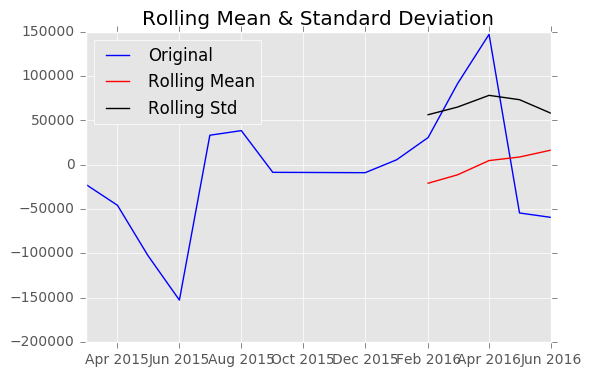

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    7.000000
Critical Value (5%)           -3.477583
Critical Value (1%)           -4.938690
Critical Value (10%)          -2.843868
dtype: float64


In [528]:
ts_decompose = residual + trend
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)